### **Importing libraries**

In [117]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## ensemble models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### cross validation, Hypertuning params
from sklearn.model_selection import cross_val_score, GridSearchCV


import warnings
warnings.filterwarnings("ignore")

In [125]:
df = pd.read_csv("d:\\IncomePredictor\\notebooks\\data\\adult_ini.csv")

In [126]:
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,Gov,278.416954,Bachelors,13,Never-married,Adm-clerical,Other,White,Male,2.348587,0.0,40,United-States,0
1,50,Private,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,0
2,38,Private,464.377002,College,9,No spouse,Handlers-cleaners,Other,White,Male,0.000000,0.0,40,United-States,0


In [132]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

### **Encoding the data**

In [127]:
le = LabelEncoder()

In [128]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [122]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['native_country'] = le.fit_transform(df['native_country'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])

In [123]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,1,278.416954,1,13,1,0,1,3,1,2.348587,0.0,40,38,0
1,50,2,288.636450,1,13,0,3,0,3,1,0.000000,0.0,13,38,0


### **Scaling the data**

In [51]:
ds_x = df.drop('income', axis=1)
y = df[['income']]

In [52]:
sc = StandardScaler()
dataset = sc.fit_transform(ds_x)

In [53]:
X = pd.DataFrame(dataset, columns=ds_x.columns)

In [54]:
X.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.030390,-1.770297,-1.173927,-0.894767,1.134777,0.317397,-1.545209,0.625471,0.395889,0.70302,2.845440,-0.22121,-0.035664,0.261131
1,0.836973,0.259021,-1.088519,-0.894767,1.134777,-0.962299,-0.790133,-1.126053,0.395889,0.70302,-0.299307,-0.22121,-2.222483,0.261131


In [55]:
y.head(2)

,income
0,0
1,0


### **Fitting data into classification models**

creating instances of classification models

In [56]:
lg = LogisticRegression()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()

train test split

In [57]:
X.shape, y.shape

((32537, 14), (32537, 1))

In [58]:
X_train, X_test, y_train, y_test  = train_test_split(X, y ,test_size=0.3, random_state=11)

In [59]:
X_train.shape, X_test.shape

((22775, 14), (9762, 14))

In [60]:
y_train.shape, y_test.shape

((22775, 1), (9762, 1))

In [61]:
for mod in [lg, dt, gnb, svc, knn]:
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    test_score = accuracy_score(y_test, pred)
    train_score = accuracy_score(y_train, mod.predict(X_train))
    
    print(mod)
    print("---"*10)
    print(f"test_score : {test_score}")
    print(f"train_score : {train_score}")
    print(f"Accuracy score of train data : {accuracy_score(y_test, pred)}")
    print(f"Accuracy score of test data : {accuracy_score(y_train, mod.predict(X_train))}")
    print(f"classification_report : {classification_report(y_test,pred)}")
    print(f"confusion_matrix : {confusion_matrix(y_test, pred)}")
    print("**"*60)

LogisticRegression()
------------------------------
test_score : 0.8279041180086048
train_score : 0.833589462129528
Accuracy score of train data : 0.8279041180086048
Accuracy score of test data : 0.833589462129528
classification_report :               precision    recall  f1-score   support

           0       0.86      0.93      0.89      7383
           1       0.70      0.51      0.59      2379

    accuracy                           0.83      9762
   macro avg       0.78      0.72      0.74      9762
weighted avg       0.82      0.83      0.82      9762

confusion_matrix : [[6857  526]
 [1154 1225]]
************************************************************************************************************************
DecisionTreeClassifier()
------------------------------
test_score : 0.811821348084409
train_score : 0.9998682766190999
Accuracy score of train data : 0.811821348084409
Accuracy score of test data : 0.9998682766190999
classification_report :               precision   

Observation ---->   We achieve the best results using — 'Support Vector Classifier', which provides an accuracy of 84% on test data. 

### **Fitting the data to classification models to check how our ensemble models perform on the given dataset**

In [17]:
rfc = RandomForestClassifier()
ad = AdaBoostClassifier()
gd = GradientBoostingClassifier()

In [18]:
X_train1, X_test1, y_train1, y_test1  = train_test_split(X, y ,test_size=0.3, random_state=11)

In [19]:
for en_mod in [rfc,ad,gd]:
    en_mod.fit(X_train1, y_train1)
    prediction = en_mod.predict(X_test1)
    test_score = accuracy_score(y_test1, prediction)
    train_score = accuracy_score(y_train1, en_mod.predict(X_train1))
    
    print(en_mod)
    print("---"*10)
    print(f"test_score : {test_score}")
    print(f"train_score : {train_score}")
    print(f"Accuracy score of train data : {accuracy_score(y_test1, prediction)}")
    print(f"Accuracy score of test data : {accuracy_score(y_train1, en_mod.predict(X_train1))}")
    print(f"classification_report : \n{classification_report(y_test1,prediction)}")
    print(f"confusion_matrix : \n{confusion_matrix(y_test1, prediction)}")
    print("**"*60)

RandomForestClassifier()
------------------------------
test_score : 0.853820938332309
train_score : 0.9998682766190999
Accuracy score of train data : 0.853820938332309
Accuracy score of test data : 0.9998682766190999
classification_report : 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7383
           1       0.74      0.61      0.67      2379

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762

confusion_matrix : 
[[6884  499]
 [ 928 1451]]
************************************************************************************************************************
AdaBoostClassifier()
------------------------------
test_score : 0.85720139315714
train_score : 0.8600219538968167
Accuracy score of train data : 0.85720139315714
Accuracy score of test data : 0.8600219538968167
classification_report : 
              precision  

Observation ---> the Gradient Boosting Classifier gives us an accuracy of ~87% (higher than SVC), and the f1-score, recall and precision scores also improve. Hence we choose 'Gradient boosting classifier' as our final model, and proceed with hypertuning the model.

### **Cross validation**  
the goal of cross-validation is to test the model’s ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset 

In [27]:
for i in range(2,9):
    cv = cross_val_score(gd, X, y, cv=i)
    print(gd, cv.mean())

GradientBoostingClassifier() 0.8653533494827096
GradientBoostingClassifier() 0.8649230813177521
GradientBoostingClassifier() 0.8647079405513881
GradientBoostingClassifier() 0.8656608471100433
GradientBoostingClassifier() 0.8644927467719893
GradientBoostingClassifier() 0.8644622145105194
GradientBoostingClassifier() 0.8649847266980147


Observation ----> the model is not overfitting and will perform well for new data that fed to our model. 

In [16]:
params = {
    'learning_rate' : [0.1,0.01],
    'max_depth' : [3,4,5],
    'min_samples_leaf' : [1,2],
    'min_samples_split' : [2,3],
    'n_estimators' : [10,50,100]
}

In [20]:
gcv = GridSearchCV(gd,params)

In [ ]:
result = gcv.fit(X_train1, y_train1)

In [ ]:
result.best_params_

In [ ]:
pip install tune-sklearn ray[tune]

In [15]:
from tune_sklearn import TuneGridSearchCV

In [26]:
tgcv = TuneGridSearchCV(gd,params)

In [27]:
res = tgcv.fit(X_train1, y_train1)

(_Trainable pid=10360) d:\IncomePredictor\venv\lib\site-packages\scikit_learn-1.2.2-py3.8-win-amd64.egg\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
(_Trainable pid=10360)   y = column_or_1d(y, warn=True)
(_Trainable pid=7476) d:\IncomePredictor\venv\lib\site-packages\scikit_learn-1.2.2-py3.8-win-amd64.egg\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(). [repeated 39x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_Trainable pid=7476)   y = column_or_1d(y, warn=True) [repeated 39x across cluster]
(_Trainable pid=10928) d:\IncomePredictor\venv\lib\site-p

In [28]:
res.base_estimator

GradientBoostingClassifier()

In [29]:
res.analysis_

In [30]:
res.best_index_

58

In [32]:
res.best_score_

0.8711745334796926

In [33]:
res.cv_results_

{'params': [{'learning_rate': 0.1,
   'max_depth': 3,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 10},
  {'learning_rate': 0.01,
   'max_depth': 3,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 10},
  {'learning_rate': 0.1,
   'max_depth': 4,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 10},
  {'learning_rate': 0.01,
   'max_depth': 4,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 10},
  {'learning_rate': 0.1,
   'max_depth': 5,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 10},
  {'learning_rate': 0.01,
   'max_depth': 5,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 10},
  {'learning_rate': 0.1,
   'max_depth': 3,
   'min_samples_leaf': 2,
   'min_samples_split': 2,
   'n_estimators': 10},
  {'learning_rate': 0.01,
   'max_depth': 3,
   'min_samples_leaf': 2,
   'min_samples_split': 2,
   'n_estimators': 10},
  {'learning_rate'

In [31]:
res.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

### **ROC_curve**

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

In [35]:
gd.fit(X_train1,y_train1)
pred_prob = gd.predict_proba(X_test1)

In [ ]:
pred_prob

In [37]:
fpr, tpr, thresholds = roc_curve(y_test1,pred_prob[:,1] ,pos_label=1)
auc_score = roc_auc_score(y_test1,pred_prob[:,1])

In [40]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test1))]
p_fpr, p_tpr, _ = roc_curve(y_test1, random_probs, pos_label=1)

In [38]:
auc_score

0.9242777777493107

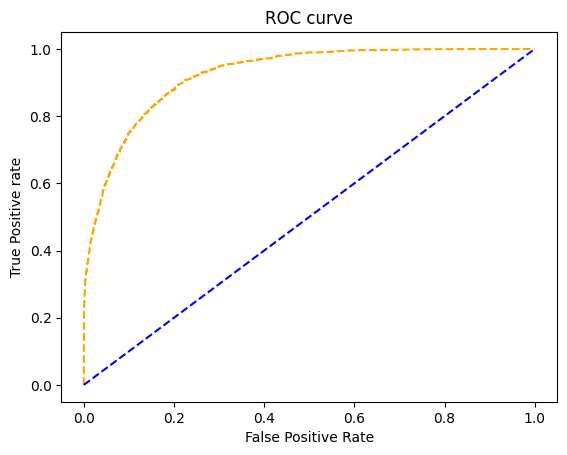

In [43]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()